In [1]:
import pandas as pd
import matplotlib.pyplot as pl

In [3]:
housing_data = pd.read_csv("C:\\Users\\sarth\\Documents\\ScikitLearn\\Datasets\\housing_csv\\housing.csv") #Read input data
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16292,-121.24,37.96,37.0,1175.0,260.0,951.0,267.0,2.8750,57700.0,INLAND
18832,-122.92,41.70,23.0,4017.0,792.0,1634.0,619.0,2.3571,62000.0,INLAND
5896,-118.33,34.16,23.0,1359.0,428.0,770.0,380.0,3.4016,234600.0,<1H OCEAN
2972,-119.08,35.34,16.0,1535.0,238.0,768.0,236.0,5.4449,118500.0,INLAND
382,-122.16,37.74,52.0,771.0,147.0,355.0,144.0,4.1458,143400.0,NEAR BAY


In [5]:
housing_data.shape

(20640, 10)

In [6]:
housing_data = housing_data.dropna() #drop rows that hold null values

In [7]:
housing_data.shape

(20433, 10)

In [28]:
housing_data.loc[housing_data['median_house_value']==500001].count() #Count of median_house_values,A good data percentage is skewed around this value and this is where the median_house_value caps off.

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [10]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value']==500001].index) #Drop the cap-off value to correct the skew

In [11]:
housing_data.shape

(19475, 10)

In [12]:
housing_data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
housing_data = pd.get_dummies(housing_data, columns=["ocean_proximity"]) #Convert the ocean_proximity into numeric feature using one-hot encoding

In [14]:
housing_data.shape

(19475, 14)

In [15]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5445,-118.44,34.00,22.0,5822.0,1707.0,3335.0,1585.0,3.1579,243100.0,1,0,0,0,0
5935,-117.87,34.15,24.0,5745.0,735.0,2061.0,679.0,8.2827,451400.0,0,1,0,0,0
8474,-118.32,33.91,34.0,3041.0,677.0,1920.0,640.0,4.5304,181300.0,1,0,0,0,0
15409,-117.24,33.22,20.0,1962.0,334.0,1173.0,349.0,4.1316,162500.0,1,0,0,0,0
447,-122.28,37.88,52.0,1909.0,416.0,811.0,406.0,3.0060,227900.0,0,0,0,1,0


In [17]:
X = housing_data.drop("median_house_value", axis=1) #createX-axis by dropping the target column and include all others as features
Y = housing_data["median_house_value"]

In [21]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
Y.values

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2) #Split data into 80/20 for train and test set

In [26]:
x_train.shape,x_test.shape

((15580, 13), (3895, 13))

In [29]:
y_train.shape,y_test.shape

((15580,), (3895,))

In [30]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train, y_train) #Instantiate a LinearRegression and normalize it between 0 and 1

In [31]:
print("Training Score:", linear_model.score(x_train, y_train)) # find the score of training model b getting the R-score.

Training Score: 0.6158758354145593


In [32]:
predictors = x_train.columns
print(predictors)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [35]:
coef = pd.Series(linear_model.coef_,predictors).sort_values()#find the coeff of the linear model y=mx+c,negative/positive indicates the contribution or the weight to decrease/increase the target value
print(coef)

ocean_proximity_INLAND        -25712.441744
longitude                     -24613.254661
latitude                      -22395.957564
population                       -28.854392
total_rooms                       -7.728130
households                        34.995951
total_bedrooms                    99.083224
housing_median_age               942.449852
ocean_proximity_NEAR BAY        6010.088486
ocean_proximity_<1H OCEAN      13138.287066
ocean_proximity_NEAR OCEAN     17089.361748
median_income                  38699.674534
ocean_proximity_ISLAND        178861.872506
dtype: float64


In [36]:
y_pred = linear_model.predict(x_test)

In [37]:
diff_pred_actual = pd.DataFrame({"predicted":y_pred, "actual":y_test})
diff_pred_actual.head(10)

,predicted,actual
18447,260861.143849,233100.0
7000,192622.804897,148800.0
12940,203822.984774,258700.0
251,154090.665092,80600.0
3220,153140.892930,92800.0
9674,124054.892160,159300.0
19910,126109.580401,92500.0
17228,321881.791154,383100.0
15094,191560.724434,108300.0
7324,147337.280432,156100.0


In [39]:
from sklearn.metrics import r2_score
print("Testing Score:", r2_score(y_test,y_pred))

Testing Score: 0.6006976297497757


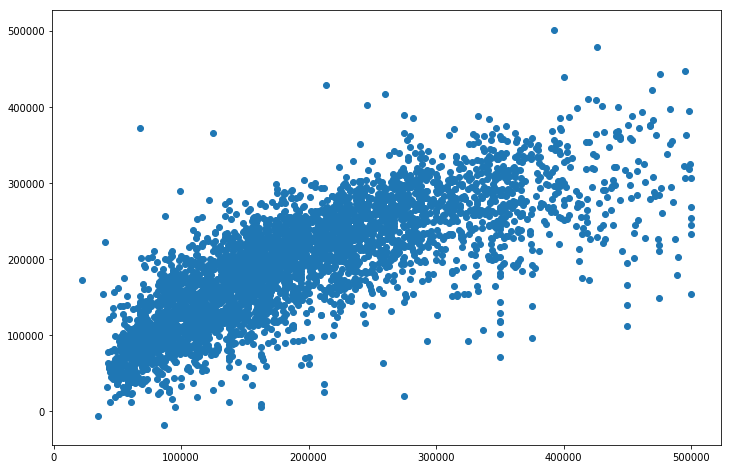

In [48]:
fig, ax = pl.subplots(figsize=(12,8))
pl.scatter(y_test, y_pred)
pl.show()

In [49]:
diff_pred_actual_sample = diff_pred_actual.sample(100)
diff_pred_actual_sample = diff_pred_actual_sample.reset_index()

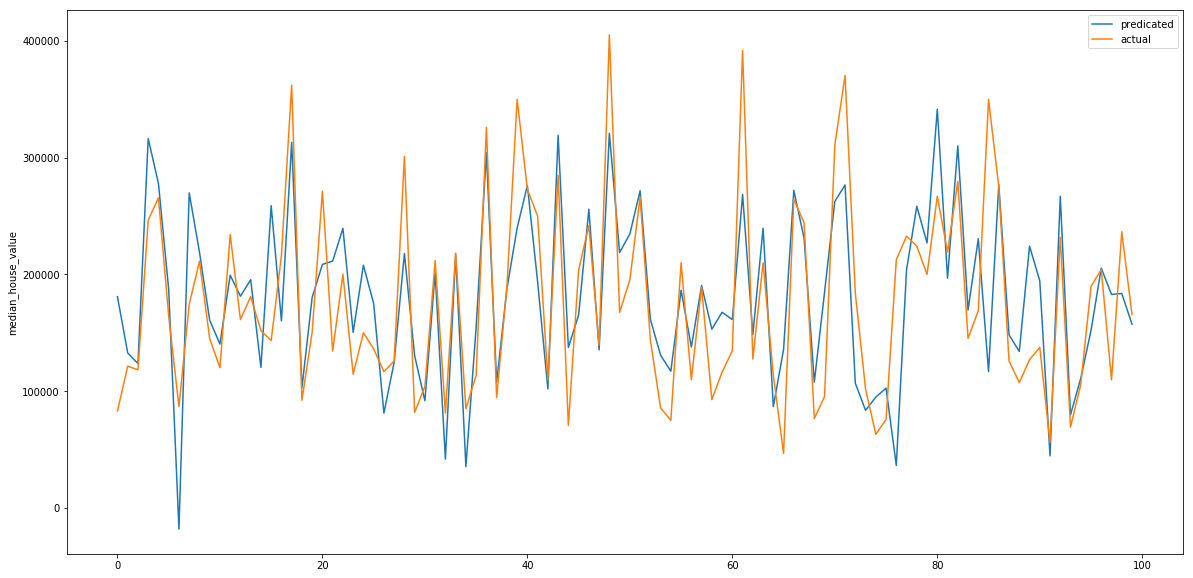

In [50]:
pl.figure(figsize=(20,10))
pl.plot(diff_pred_actual_sample["predicted"],label="predicated")
pl.plot(diff_pred_actual_sample["actual"], label="actual")
pl.ylabel("median_house_value")
pl.legend()
pl.show()